# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
F_Lat =  pd.cut(sinasc_raw['munResLat'], [-90, -10.5, 90])
F_Lat

0        (-90.0, -10.5]
1        (-90.0, -10.5]
2        (-90.0, -10.5]
3        (-90.0, -10.5]
4        (-90.0, -10.5]
              ...      
27023    (-90.0, -10.5]
27024    (-90.0, -10.5]
27025    (-90.0, -10.5]
27026    (-90.0, -10.5]
27027    (-90.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-90.0, -10.5] < (-10.5, 90.0]]

In [6]:
F_Lat.value_counts()

(-10.5, 90.0]     14034
(-90.0, -10.5]    12993
Name: munResLat, dtype: int64

In [7]:
sinasc_raw.groupby([F_Lat])[['CONSULTAS', 'SEMAGESTAC', 'PESO']].agg([sum,min,'mean',max,'std','var'])

CONSULTAS                                       SEMAGESTAC  \
                     sum min      mean max       std       var        sum   
munResLat                                                                   
(-90.0, -10.5]     48000   1  3.694297   9  0.643372  0.413928   482665.0   
(-10.5, 90.0]      48662   1  3.467436   9  0.888240  0.788970   511951.0   

                                                               PESO       \
                 min       mean   max       std       var       sum  min   
munResLat                                                                  
(-90.0, -10.5]  19.0  38.545360  45.0  2.012435  4.049895  42098594  258   
(-10.5, 90.0]   21.0  38.588302  45.0  2.020722  4.083319  45555148  295   

                                                              
                       mean   max         std            var  
munResLat                                                     
(-90.0, -10.5]  3240.098053  5985  531.815114  282827.315354  
(-10.5, 90.0]   3246.055864  5190  556.487709  309678.570242

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
sinasc_raw['munResArea'].max() #para ter uma ideia do limite máximo da faixa a ser criada

34096.394

In [11]:
F_Area = pd.cut(sinasc_raw['munResArea'], [0,3000,99999], right = False)
sinasc_raw.groupby([F_Area])[['QTDFILVIVO', 'QTDFILMORT']].agg([sum,min,'mean', 'median', max, 'std', 'var'])

QTDFILVIVO                                                  \
                     sum  min      mean median   max       std       var   
munResArea                                                                 
[0, 3000)         4773.0  0.0  0.924284    1.0  30.0  1.075442  1.156575   
[3000, 99999)    22053.0  0.0  1.086890    1.0  14.0  1.191750  1.420268   

              QTDFILMORT                                                  
                     sum  min      mean median   max       std       var  
munResArea                                                                
[0, 3000)         1260.0  0.0  0.244803    0.0   4.0  0.551215  0.303838  
[3000, 99999)     5383.0  0.0  0.272116    0.0  28.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
F_alt = pd.cut(sinasc_raw['munResAlt'], 4,right=False)
F_alt.value_counts()

[85.0, 212.5)      21269
[212.5, 340.0)      3638
[467.5, 595.51)     1590
[340.0, 467.5)       530
Name: munResAlt, dtype: int64

In [13]:
sinasc_raw.groupby([F_alt])[['QTDGESTANT','QTDPARTNOR','QTDPARTCES']].agg([sum,min,'mean','median', max,'std','var',])

QTDGESTANT                                                  \
                       sum  min      mean median   max       std       var   
munResAlt                                                                    
[85.0, 212.5)      26397.0  0.0  1.313414    1.0  52.0  1.448367  2.097766   
[212.5, 340.0)      4106.0  0.0  1.137081    1.0  12.0  1.230177  1.513337   
[340.0, 467.5)       600.0  0.0  1.151631    1.0   9.0  1.271750  1.617348   
[467.5, 595.51)     1813.0  0.0  1.143849    1.0   9.0  1.213664  1.472981   

                QTDPARTNOR                 ...                            \
                       sum  min      mean  ...   max       std       var   
munResAlt                                  ...                             
[85.0, 212.5)      12544.0  0.0  0.645367  ...  41.0  1.254638  1.574116   
[212.5, 340.0)      1305.0  0.0  0.361897  ...  40.0  1.083827  1.174681   
[340.0, 467.5)       200.0  0.0  0.384615  ...   8.0  0.923966  0.853713   
[467.5, 595.51)      522.0  0.0  0.329338  ...   9.0  0.840907  0.707125   

                QTDPARTCES                                                  
                       sum  min      mean median   max       std       var  
munResAlt                                                                   
[85.0, 212.5)       9633.0  0.0  0.493342    0.0  12.0  0.741340  0.549584  
[212.5, 340.0)      2268.0  0.0  0.629126    0.0   5.0  0.755142  0.570239  
[340.0, 467.5)       297.0  0.0  0.571154    0.0   4.0  0.764541  0.584523  
[467.5, 595.51)      938.0  0.0  0.591798    0.0   4.0  0.754152  0.568746  

[4 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [33]:
sinasc2=sinasc_raw.set_index('munResNome')
sinasc2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [38]:
imediatas = {"Candeias do Jamari":"Porto Velho", "Guajará-Mirim":"Porto Velho", 
             "Itapuã do Oeste":"Porto Velho", "Nova Mamoré":"Porto Velho", "Porto Velho":"Porto Velho",
             "Alto Paraíso":"Ariquemes", "Ariquemes":"Ariquemes", "Buritis":"Ariquemes", 
             "Cacaulândia":"Ariquemes", "Campo Novo de Rondônia":"Ariquemes", "Cujubim":"Ariquemes", 
             "Monte Negro":"Ariquemes", "Rio Crespo":"Ariquemes",
             "Governador Jorge Teixeira":"Jaru", "Jaru":"Jaru", "Machadinho D'Oeste":"Jaru", 
             "Theobroma":"Jaru", "Vale do Anari":"Jaru",
             "Alvorada D'Oeste":"Ji-Paraná", "Costa Marques":"Ji-Paraná", "Ji-Paraná":"Ji-Paraná", 
             "Mirante da Serra":"Ji-Paraná", "Nova União":"Ji-Paraná", "Ouro Preto do Oeste":"Ji-Paraná",
             "Presidente Médici":"Ji-Paraná", "São Francisco do Guaporé":"Ji-Paraná",
             "São Miguel do Guaporé":"Ji-Paraná", "Seringueiras":"Ji-Paraná", "Teixeirópolis":"Ji-Paraná", 
             "Urupá":"Ji-Paraná", "Vale do Paraíso":"Ji-Paraná",
             "Alta Floresta D'Oeste":"Cacoal", "Alto Alegre dos Parecis":"Cacoal", "Cacoal":"Cacoal", 
             "Castanheiras":"Cacoal", "Espigão D'Oeste":"Cacoal", "Ministro Andreazza":"Cacoal", 
             "Nova Brasilândia D'Oeste":"Cacoal", "Novo Horizonte do Oeste":"Cacoal", "Parecis":"Cacoal", 
             "Pimenta Bueno":"Cacoal", "Primavera de Rondônia":"Cacoal", "Rolim de Moura":"Cacoal", 
             "Santa Luzia d'Oeste":"Cacoal", "São Felipe D'Oeste":"Cacoal",
             "Cabixi":"Vilhena", "Cerejeiras":"Vilhena", "Chupinguaia":"Vilhena", 
             "Colorado do Oeste":"Vilhena", "Corumbiara":"Vilhena", "Pimenteiras do Oeste":"Vilhena", 
             "Vilhena":"Vilhena"}

In [42]:
sinasc_2 = sinasc_raw.set_index('munResNome')
imediatas = sinasc_2.groupby(imediatas).count()
imediatas

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Ariquemes,3233,3219,3233,3233,3233,3180,3209,3094,2981,2769,...,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
Cacoal,4504,4496,4504,4504,4504,4471,4476,3774,4467,4455,...,4504,4504,4504,4504,4504,4504,4504,4504,4504,4504
Jaru,1683,1678,1683,1683,1683,1663,1668,1428,1659,1645,...,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
Ji-Paraná,4962,4954,4962,4962,4962,4895,4914,4540,4925,4911,...,4962,4962,4962,4962,4962,4962,4962,4962,4962,4962
Porto Velho,10096,10031,10096,10096,10096,9960,9913,8958,8886,8618,...,10096,10096,10096,10096,10096,10096,10096,10096,10096,10096
Vilhena,2450,2435,2450,2450,2450,2444,2437,2230,2437,2433,...,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450


In [43]:
idademedia = imediatas.pivot_table(values = ['IDADEMAE'], index = 'munResNome', aggfunc='mean')
idademedia

,IDADEMAE
munResNome,
Ariquemes,3233
Cacoal,4504
Jaru,1683
Ji-Paraná,4962
Porto Velho,10096
Vilhena,2450


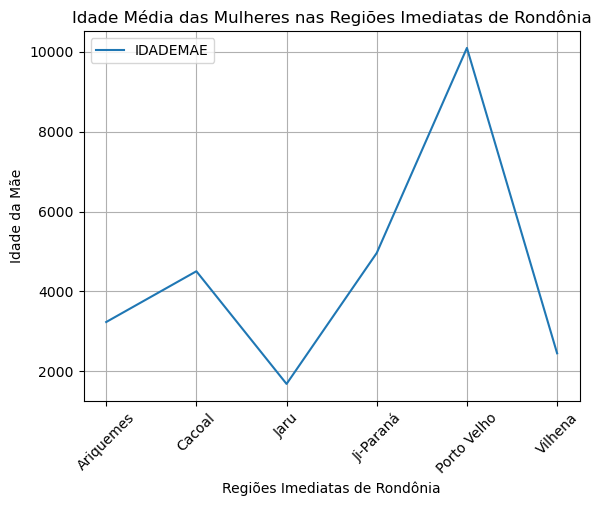

In [44]:
x = sinasc_raw['DTNASC']
y = idademedia

x, y.plot(rot=45)
plt.xlabel('Regiões Imediatas de Rondônia')
plt.ylabel('Idade da Mãe')
plt.title('Idade Média das Mulheres nas Regiões Imediatas de Rondônia')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [60]:
df = pd.read_csv('Data_IDH.csv' , sep=';', encoding = 'utf8')
df.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).

In [61]:
df.loc[(df['idh']>= 0.8) & (df['idh']<= 1), 'idh_clf'] = 'IDH muito alto'
df.loc[(df['idh']>= 0.7) & (df['idh']<= 0.799), 'idh_clf'] = 'IDH alto'
df.loc[(df['idh']>= 0.6) & (df['idh']<= 0.699), 'idh_clf'] = 'IDH médio'
df.loc[(df['idh']>= 0.5) & (df['idh']<= 0.599), 'idh_clf'] = 'IDH baixo'
df.loc[(df['idh']>= 0) & (df['idh']<= 0.499), 'idh_clf'] = 'IDH muito baixo'

df.head()

,municipio,regiao,idh,ifdm,pib,idh_clf
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto


In [62]:
df1 = df.loc[(df['idh_clf'] == 'IDH alto')]
df1.head()

,municipio,regiao,idh,ifdm,pib,idh_clf
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto
23,Ji-Paraná,Ji-Paraná,0.714,0.7117,3783972,IDH alto
34,Pimenta Bueno,Cacoal,0.710,0.7383,1164877,IDH alto
36,Porto Velho,Porto Velho,0.736,0.7257,17912070,IDH alto


In [63]:
df2 = df.loc[(df['idh_clf'] == 'IDH médio')]
df2.head()

,municipio,regiao,idh,ifdm,pib,idh_clf
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio


In [64]:
df3 = df.loc[(df['idh_clf'] == 'IDH baixo')]
df3.head()

,municipio,regiao,idh,ifdm,pib,idh_clf
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo
19,Governador Jorge Teixeira,Jaru,0.596,0.4562,148027,IDH baixo
24,Machadinho D'Oeste,Jaru,0.596,0.5322,633000,IDH baixo
29,Nova Mamoré,Porto Velho,0.587,0.5084,529000,IDH baixo


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


O Índice FIRJAN de Desenvolvimento Municipal (IFDM) é um estudo anual criado para acompanhar o desenvolvimento humano, econômico e social dos municípios do Estado do Rio de Janeiro, mas passou a acompanhar todos os municípios do Brasil (5.565 no total), com base exclusivamente em estatísticas oficiais. Ele leva em conta três indicadores: emprego e renda como um único indicador e educação e saúde como indicadores separados.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [65]:
mapping = {"Candeias do Jamari":"Porto Velho", "Guajará-Mirim":"Porto Velho", 
             "Itapuã do Oeste":"Porto Velho", "Nova Mamoré":"Porto Velho", "Porto Velho":"Porto Velho",
             "Alto Paraíso":"Ariquemes", "Ariquemes":"Ariquemes", "Buritis":"Ariquemes", 
             "Cacaulândia":"Ariquemes", "Campo Novo de Rondônia":"Ariquemes", "Cujubim":"Ariquemes", 
             "Monte Negro":"Ariquemes", "Rio Crespo":"Ariquemes",
             "Governador Jorge Teixeira":"Jaru", "Jaru":"Jaru", "Machadinho D'Oeste":"Jaru", 
             "Theobroma":"Jaru", "Vale do Anari":"Jaru",
             "Alvorada D'Oeste":"Ji-Paraná", "Costa Marques":"Ji-Paraná", "Ji-Paraná":"Ji-Paraná", 
             "Mirante da Serra":"Ji-Paraná", "Nova União":"Ji-Paraná", "Ouro Preto do Oeste":"Ji-Paraná",
             "Presidente Médici":"Ji-Paraná", "São Francisco do Guaporé":"Ji-Paraná",
             "São Miguel do Guaporé":"Ji-Paraná", "Seringueiras":"Ji-Paraná", "Teixeirópolis":"Ji-Paraná", 
             "Urupá":"Ji-Paraná", "Vale do Paraíso":"Ji-Paraná",
             "Alta Floresta D'Oeste":"Cacoal", "Alto Alegre dos Parecis":"Cacoal", "Cacoal":"Cacoal", 
             "Castanheiras":"Cacoal", "Espigão D'Oeste":"Cacoal", "Ministro Andreazza":"Cacoal", 
             "Nova Brasilândia D'Oeste":"Cacoal", "Novo Horizonte do Oeste":"Cacoal", "Parecis":"Cacoal", 
             "Pimenta Bueno":"Cacoal", "Primavera de Rondônia":"Cacoal", "Rolim de Moura":"Cacoal", 
             "Santa Luzia d'Oeste":"Cacoal", "São Felipe D'Oeste":"Cacoal",
             "Cabixi":"Vilhena", "Cerejeiras":"Vilhena", "Chupinguaia":"Vilhena", 
             "Colorado do Oeste":"Vilhena", "Corumbiara":"Vilhena", "Pimenteiras do Oeste":"Vilhena", 
             "Vilhena":"Vilhena"}

df4 = df.set_index('municipio')
df4.groupby(mapping).sum()

C:\Users\willi\AppData\Local\Temp\ipykernel_15144\3542936854.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4.groupby(mapping).sum()


,idh,ifdm,pib
municipio,,,
Ariquemes,5.044,4.8174,4670292
Cacoal,8.513,7.9476,6973927
Jaru,3.054,2.7449,2527726
Ji-Paraná,8.278,7.9312,7177652
Porto Velho,3.243,2.9984,20011421
Vilhena,4.688,4.4988,4241511


In [66]:
# Município com maior IDH: Porto Velho.
# Município com menor IDH: Vale do Arani.

df.groupby('municipio')['idh'].max().sort_values(ascending = False)

municipio
Porto Velho                  0.736
Vilhena                      0.731
Cacoal                       0.718
Ji-Paraná                    0.714
Pimenta Bueno                0.710
Ariquemes                    0.702
Rolim de Moura               0.700
Cerejeiras                   0.692
Jaru                         0.689
Colorado do Oeste            0.685
Ouro Preto do Oeste          0.682
Espigão D'Oeste              0.672
Santa Luzia D'Oeste          0.670
Pimenteiras do Oeste         0.665
Presidente Médici            0.664
Castanheiras                 0.658
Guajará-Mirim                0.657
Chupinguaia                  0.652
Cabixi                       0.650
Candeias do Jamari           0.649
São Felipe D'Oeste           0.649
Cacaulândia                  0.646
São Miguel do Guaporé        0.646
Nova Brasilândia D'Oeste     0.643
Rio Crespo                   0.643
Teixeirópolis                0.643
Mirante da Serra             0.643
Alvorada D'Oeste             0.643
Alta Flore

In [67]:
# Município com maior IDFM: Ariquemes.
# Município com menor IDFM: Governador Jorge Teixeira.

df.groupby('municipio')['ifdm'].max().sort_values(ascending = False)

municipio
Ariquemes                    0.7746
Vilhena                      0.7465
Pimenta Bueno                0.7383
Porto Velho                  0.7257
Ji-Paraná                    0.7117
Cacoal                       0.7111
Santa Luzia D'Oeste          0.6850
Rolim de Moura               0.6785
Chupinguaia                  0.6766
São Miguel do Guaporé        0.6699
Pimenteiras do Oeste         0.6501
Teixeirópolis                0.6500
Colorado do Oeste            0.6473
Jaru                         0.6450
Rio Crespo                   0.6430
Primavera de Rondônia        0.6384
Alta Floresta D'Oeste        0.6337
Ouro Preto do Oeste          0.6261
São Francisco do Guaporé     0.6214
Buritis                      0.6199
Candeias do Jamari           0.6199
São Felipe D'Oeste           0.6153
Presidente Médici            0.6140
Cerejeiras                   0.6137
Monte Negro                  0.6016
Urupá                        0.6006
Espigão D'Oeste              0.5973
Seringueiras      

In [68]:
# Município com maior PIB: Porto Velho.
# Município com menor PIB: Primavera de Rondônia.

df.groupby('municipio')['pib'].max().sort_values(ascending = False)

municipio
Porto Velho                  17912070
Ji-Paraná                     3783972
Vilhena                       2831175
Ariquemes                     2579830
Cacoal                        2261644
Jaru                          1500890
Rolim de Moura                1283434
Pimenta Bueno                 1164877
Guajará-Mirim                  893000
Ouro Preto do Oeste            834000
Buritis                        726000
Machadinho D'Oeste             633000
Espigão D'Oeste                625000
São Miguel do Guaporé          616000
Candeias do Jamari             548000
Nova Mamoré                    529000
Cerejeiras                     507000
Alta Floresta D'Oeste          496000
Presidente Médici              428000
Cujubim                        385000
Nova Brasilândia D'Oeste       360000
Alto Paraíso                   358000
São Francisco do Guaporé       353000
Colorado do Oeste              335000
Monte Negro                    219152
Alto Alegre dos Parecis        213410
Ca

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Dos dados analisados é possível identificar:

a região imediata com o maior IDH é Ji-Paraná, enquanto a região imediata com menor IDH é Jaru;
a região imediata com maior PIB é Porto Velho, enquanto a região imediata com menor PIB é Jaru;
a região imediata com o maior IDFM é Cacoal, enquanto a região imediata com menor IDH é Jaru;
o maior IDH foi da cidade de Porto Velho e o menor foi da cidade de Vale do Anari;
o maior IFDM foi apresentado pela cidade de Ariquemes e o menor foi apresentado pela cidade de Governador Jorge Teixeira;
o maior PIB foi o da cidade de Porto Velho. O menor foi o da cidade de Primavera de Rondônia.